<a href="https://colab.research.google.com/github/jacksonguedes/PIVIC/blob/main/Corre%C3%A7%C3%B5es_PIVIC_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#import seaborn as srn
#import statistics as sts
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dados_canal_H1 = pd.read_csv("F0000CH1.CSV",  sep=",")
dados_canal_H2 = pd.read_csv("F0000CH2.CSV",  sep=",")
dados_canal_H3 = pd.read_csv("F0000CH3.CSV",  sep=",")
dados_canal_H4 = pd.read_csv("F0000CH4.CSV",  sep=",")

novo_CH1 = dados_canal_H1.copy()
novo_CH2 = dados_canal_H2.copy()
novo_CH3 = dados_canal_H3.copy()
novo_CH4 = dados_canal_H4.copy()

In [ ]:
novo_CH1.columns = ["A", "B", "C", "Tempo1", "Amplitude1", "F"]
novo_CH2.columns = ["A", "B", "C", "Tempo2", "Amplitude2", "F"]
novo_CH3.columns = ["A", "B", "C", "Tempo3", "Amplitude3", "F"]
novo_CH4.columns = ["A", "B", "C", "Tempo4", "Amplitude4", "F"]

In [ ]:
# Resistência do resistor shunt em ohms
resistencia = 1000  # 1k ohms

# Converter os dados de tensão para corrente usando a Lei de Ohm
corrente_CH2 = novo_CH2['Amplitude2'] / resistencia

corrente_CH3 = novo_CH3['Amplitude3'] / resistencia

corrente_CH4 = novo_CH4['Amplitude4'] / resistencia

# ESPECTRO DA TENSÃO

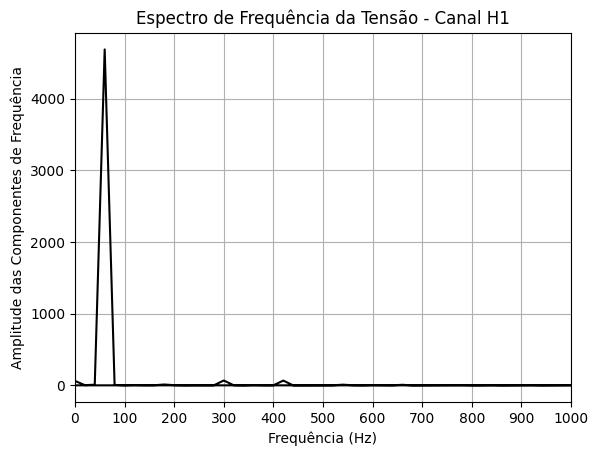

In [ ]:
# Extrair tempo e amplitude
tempo1 = novo_CH1['Tempo1']
amplitude1 = novo_CH1['Amplitude1']

# Calcular a FFT
fft_amplitude_tensao = np.fft.fft(amplitude1)

# Ângulos
angulo_tensao = np.angle(fft_amplitude_tensao)

#Valores absolutos
valores_absolutos_tensao = np.abs(fft_amplitude_tensao)

# Calcular as frequências correspondentes
frequencias_tensao = np.fft.fftfreq(len(tempo1), tempo1[1] - tempo1[0])

# Plotar o espectro de frequência
plt.plot(frequencias_tensao, valores_absolutos_tensao, color = 'black')
plt.title('Espectro de Frequência da Tensão - Canal H1')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude das Componentes de Frequência')
plt.grid(True)
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1001, 100))
plt.show()

In [ ]:
# Convertendo os ângulos para graus
angulo_graus_tensao = np.degrees(angulo_tensao)

# Listas para salvar os valores de frequência, módulo e ângulo para TENSÃO.
frequencias_salvas_tensao = []
modulos_salvos_tensao = []
angulos_salvos_tensao = []
frequencias_multiplos_60_tensao = []
modulos_multiplos_60_tensao = []
angulos_multiplos_60_tensao = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro da tensão\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for f_tensao, mod_tensao, ang_graus_tensao in zip(frequencias_tensao[frequencias_tensao > 0], valores_absolutos_tensao[frequencias_tensao > 0], angulo_graus_tensao[frequencias_tensao > 0]):

  if (f_tensao > 60) and (f_tensao < 1000) and (mod_tensao > 5):
    print(f"{f_tensao:.2f}\t\t\t{mod_tensao:.2f}\t\t\t{ang_graus_tensao:.2f}°")
    frequencias_salvas_tensao.append(f_tensao)
    modulos_salvos_tensao.append(mod_tensao)
    angulos_salvos_tensao.append(ang_graus_tensao)

Valores do espectro da tensão

Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02			4686.18			22.57°
80.03			6.97			16.73°
180.07			12.67			-48.71°
300.12			68.69			-73.82°
420.17			67.56			-77.49°
540.22			10.43			-68.13°
660.26			8.80			-143.90°


In [ ]:
# Encontrar a frequência com a maior amplitude
indice_fundamental_tensao = np.argmax(modulos_salvos_tensao)
frequencia_fundamental_tensao = frequencias_salvas_tensao[indice_fundamental_tensao]

print("Frequência fundamental:", frequencia_fundamental_tensao)

# Listas para armazenar os múltiplos
frequencias_multiplos_tensao = []
modulos_multiplos_tensao = []
angulos_multiplos_tensao = []

# Verificar os múltiplos da frequência fundamental
for i, frequencia in enumerate(frequencias_salvas_tensao):
    if frequencia % frequencia_fundamental_tensao == 0:
        frequencias_multiplos_tensao.append(frequencia)
        modulos_multiplos_tensao.append(modulos_salvos_tensao[i])
        angulos_multiplos_tensao.append(angulos_salvos_tensao[i])

# Imprimir os múltiplos encontrados
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_tensao)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_tensao, modulos_multiplos_tensao, angulos_multiplos_tensao):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t\t {angulo:.2f}")

Frequência fundamental: 60.02400960384398
Múltiplos da frequência fundamental:  60.02400960384398


Frequência (Hz)		Módulo (v)		Ângulo (graus)

60.02		 4686.1755180829				 22.57
180.07		 12.6719245683				 -48.71
300.12		 68.6900008883				 -73.82
420.17		 67.5612370360				 -77.49
540.22		 10.4296384604				 -68.13
660.26		 8.7995929424				 -143.90


# ESPECTRO DA CORRENTE DE FUGA DO PARA-RAIO A

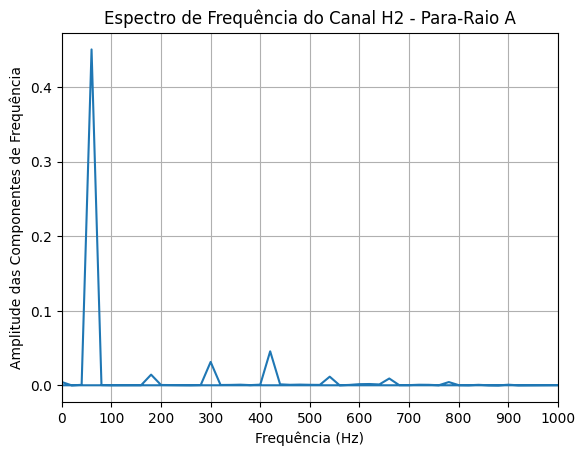

In [ ]:
tempo2 = novo_CH2['Tempo2']
amplitude2 = corrente_CH2

# Passo 3: Calcular a FFT
fft_amplitude_Corrente_A = np.fft.fft(amplitude2)

# Ângulos
angulo_Corrente_A = np.angle(fft_amplitude_Corrente_A)

#Valores absolutos
valores_absolutos_Corrente_A = np.abs(fft_amplitude_Corrente_A)

# Passo 4: Calcular as frequências correspondentes
frequencias_Corrente_A = np.fft.fftfreq(len(tempo2), tempo2[1] - tempo2[0])

# Passo 5: Plotar o espectro de frequência
plt.plot(frequencias_Corrente_A, np.abs(fft_amplitude_Corrente_A))
plt.title('Espectro de Frequência do Canal H2 - Para-Raio A')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude das Componentes de Frequência')
plt.grid(True)
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1001, 100))
plt.show()

In [ ]:
# Convertendo os ângulos para graus
angulo_graus_Corrente_A = np.degrees(angulo_Corrente_A)

# Listas para salvar os valores de frequência, módulo e ângulo para TENSÃO.
frequencias_salvas_Corrente_A = []
modulos_salvos_Corrente_A = []
angulos_salvos_Corrente_A = []
frequencias_multiplos_60_Corrente_A = []
modulos_multiplos_60_Corrente_A = []
angulos_multiplos_60_Corrente_A = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro da corrente A\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for f_Corrente_A, mod_Corrente_A, ang_graus_Corrente_A in zip(frequencias_Corrente_A[frequencias_Corrente_A > 0], valores_absolutos_Corrente_A[frequencias_Corrente_A > 0], angulo_graus_Corrente_A[frequencias_Corrente_A > 0]):

  if (f_Corrente_A > 60) and (f_Corrente_A < 1000) and (mod_Corrente_A > 2e-3):
    print(f"{f_Corrente_A:.2f}\t\t\t{mod_Corrente_A:.4f}\t\t\t{ang_graus_Corrente_A:.2f}°")
    frequencias_salvas_Corrente_A.append(f_Corrente_A)
    modulos_salvos_Corrente_A.append(mod_Corrente_A)
    angulos_salvos_Corrente_A.append(ang_graus_Corrente_A)

Valores do espectro da corrente A

Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02			0.4502			105.43°
180.07			0.0145			117.02°
300.12			0.0315			15.20°
420.17			0.0457			12.36°
540.22			0.0117			47.64°
660.26			0.0093			-55.02°
780.31			0.0045			-132.97°


In [ ]:
# Encontrar a frequência com a maior amplitude
indice_fundamental_Corrente_A = np.argmax(modulos_salvos_Corrente_A)
frequencia_fundamental_Corrente_A = frequencias_salvas_Corrente_A[indice_fundamental_Corrente_A]

print("Frequência fundamental:", frequencia_fundamental_Corrente_A)

# Listas para armazenar os múltiplos
frequencias_multiplos_Corrente_A = []
modulos_multiplos_Corrente_A = []
angulos_multiplos_Corrente_A = []

# Verificar os múltiplos da frequência fundamental
for i, frequencia_Corrente_A in enumerate(frequencias_salvas_Corrente_A):
    if frequencia_Corrente_A % frequencia_fundamental_Corrente_A == 0:
        frequencias_multiplos_Corrente_A.append(frequencia_Corrente_A)
        modulos_multiplos_Corrente_A.append(modulos_salvos_Corrente_A[i])
        angulos_multiplos_Corrente_A.append(angulos_salvos_Corrente_A[i])

# Imprimir os múltiplos encontrados
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_Corrente_A)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_Corrente_A, modulos_multiplos_Corrente_A, angulos_multiplos_Corrente_A):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t {angulo:.2f}")


Frequência fundamental: 60.02400960384398
Múltiplos da frequência fundamental:  60.02400960384398


Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02		 0.4502083346			 105.43
180.07		 0.0144611692			 117.02
300.12		 0.0314964426			 15.20
420.17		 0.0456958833			 12.36
540.22		 0.0117322680			 47.64
660.26		 0.0092932126			 -55.02
780.31		 0.0045213466			 -132.97


# ESPECTRO DA CORRENTE DE FUGA DO PARA-RAIO B

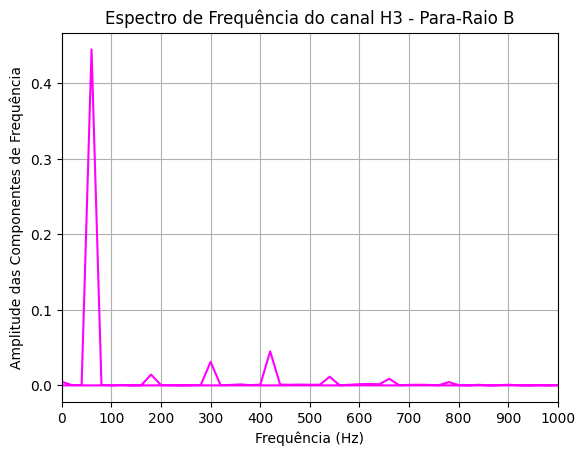

In [ ]:
tempo3 = novo_CH3['Tempo3']
amplitude3 = corrente_CH3

# Passo 3: Calcular a FFT
fft_amplitude_Corrente_B = np.fft.fft(amplitude3)

# Ângulos
angulo_Corrente_B = np.angle(fft_amplitude_Corrente_B)

#Valores absolutos
valores_absolutos_Corrente_B = np.abs(fft_amplitude_Corrente_B)

# Passo 4: Calcular as frequências correspondentes
frequencias_Corrente_B = np.fft.fftfreq(len(tempo3), tempo3[1] - tempo3[0])

# Passo 5: Plotar o espectro de frequência
plt.plot(frequencias_Corrente_B, np.abs(fft_amplitude_Corrente_B), color = 'magenta')
plt.title('Espectro de Frequência do canal H3 - Para-Raio B')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude das Componentes de Frequência')
plt.grid(True)
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1001, 100))
plt.show()

In [ ]:
# Convertendo os ângulos para graus
angulo_graus_Corrente_B = np.degrees(angulo_Corrente_B)

# Listas para salvar os valores de frequência, módulo e ângulo para TENSÃO.
frequencias_salvas_Corrente_B = []
modulos_salvos_Corrente_B = []
angulos_salvos_Corrente_B = []
frequencias_multiplos_60_Corrente_B = []
modulos_multiplos_60_Corrente_B = []
angulos_multiplos_60_Corrente_B = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro da corrente B\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for f_Corrente_B, mod_Corrente_B, ang_graus_Corrente_B in zip(frequencias_Corrente_B[frequencias_Corrente_B > 0], valores_absolutos_Corrente_B[frequencias_Corrente_B > 0], angulo_graus_Corrente_B[frequencias_Corrente_B > 0]):

  if (f_Corrente_B > 60) and (f_Corrente_B < 1000) and (mod_Corrente_B > 2e-3):
    print(f"{f_Corrente_B:.2f}\t\t\t{mod_Corrente_B:.10f}\t\t\t{ang_graus_Corrente_B:.2f}°")
    frequencias_salvas_Corrente_B.append(f_Corrente_B)
    modulos_salvos_Corrente_B.append(mod_Corrente_B)
    angulos_salvos_Corrente_B.append(ang_graus_Corrente_B)


Valores do espectro da corrente B

Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02			0.4450385553			105.71°
180.07			0.0143357582			119.54°
300.12			0.0312704108			14.76°
420.17			0.0451300798			12.61°
540.22			0.0115317233			48.77°
660.26			0.0088288198			-53.34°
780.31			0.0044672052			-133.31°


In [ ]:
# Encontrar a frequência com a maior amplitude
indice_fundamental_Corrente_B = np.argmax(modulos_salvos_Corrente_B)
frequencia_fundamental_Corrente_B = frequencias_salvas_Corrente_B[indice_fundamental_Corrente_B]

print("Frequência fundamental:", frequencia_fundamental_Corrente_B)

# Listas para armazenar os múltiplos
frequencias_multiplos_Corrente_B = []
modulos_multiplos_Corrente_B = []
angulos_multiplos_Corrente_B = []

# Verificar os múltiplos da frequência fundamental
for i, frequencia_Corrente_B in enumerate(frequencias_salvas_Corrente_B):
    if frequencia_Corrente_B % frequencia_fundamental_Corrente_B == 0:
        frequencias_multiplos_Corrente_B.append(frequencia_Corrente_B)
        modulos_multiplos_Corrente_B.append(modulos_salvos_Corrente_B[i])
        angulos_multiplos_Corrente_B.append(angulos_salvos_Corrente_B[i])

# Imprimir os múltiplos encontrados
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_Corrente_B)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_Corrente_B, modulos_multiplos_Corrente_B, angulos_multiplos_Corrente_B):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t {angulo:.2f}")


Frequência fundamental: 60.02400960384398
Múltiplos da frequência fundamental:  60.02400960384398


Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02		 0.4450385553			 105.71
180.07		 0.0143357582			 119.54
300.12		 0.0312704108			 14.76
420.17		 0.0451300798			 12.61
540.22		 0.0115317233			 48.77
660.26		 0.0088288198			 -53.34
780.31		 0.0044672052			 -133.31


# ESPECTRO DA CORRENTE DE FUGA DO PARA-RAIO C

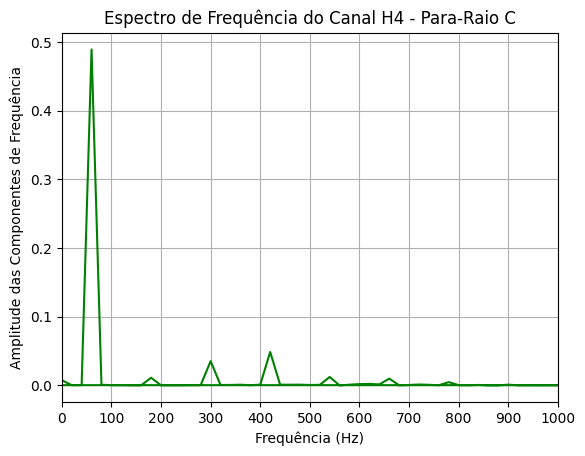

In [ ]:
tempo4 = novo_CH4['Tempo4']
amplitude4 = corrente_CH4

# Passo 3: Calcular a FFT
fft_amplitude_Corrente_C = np.fft.fft(amplitude4)

# Ângulos
angulo_Corrente_C = np.angle(fft_amplitude_Corrente_C)

#Valores absolutos
valores_absolutos_Corrente_C = np.abs(fft_amplitude_Corrente_C)

# Passo 4: Calcular as frequências correspondentes
frequencias_Corrente_C = np.fft.fftfreq(len(tempo4), tempo4[1] - tempo4[0])

# Passo 5: Plotar o espectro de frequência
plt.plot(frequencias_Corrente_C, np.abs(fft_amplitude_Corrente_C), color = 'green')
plt.title('Espectro de Frequência do Canal H4 - Para-Raio C')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude das Componentes de Frequência')
plt.grid(True)
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1001, 100))
plt.show()

In [ ]:
# Convertendo os ângulos para graus
angulo_graus_Corrente_C = np.degrees(angulo_Corrente_C)

# Listas para salvar os valores de frequência, módulo e ângulo para TENSÃO.
frequencias_salvas_Corrente_C = []
modulos_salvos_Corrente_C = []
angulos_salvos_Corrente_C = []
frequencias_multiplos_60_Corrente_C = []
modulos_multiplos_60_Corrente_C = []
angulos_multiplos_60_Corrente_C = []

# Imprimindo os valores do espectro da TENSÃO
print("Valores do espectro da corrente C\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for f_Corrente_C, mod_Corrente_C, ang_graus_Corrente_C in zip(frequencias_Corrente_C[frequencias_Corrente_C > 0], valores_absolutos_Corrente_C[frequencias_Corrente_C > 0], angulo_graus_Corrente_C[frequencias_Corrente_C > 0]):

  if (f_Corrente_C > 60) and (f_Corrente_C < 1000) and (mod_Corrente_C > 2.5e-3):
    print(f"{f_Corrente_C:.2f}\t\t\t{mod_Corrente_C:.4f}\t\t\t{ang_graus_Corrente_C:.2f}°")
    frequencias_salvas_Corrente_C.append(f_Corrente_C)
    modulos_salvos_Corrente_C.append(mod_Corrente_C)
    angulos_salvos_Corrente_C.append(ang_graus_Corrente_C)


Valores do espectro da corrente C

Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02			0.4893			106.19°
180.07			0.0112			110.79°
300.12			0.0353			16.06°
420.17			0.0487			13.76°
540.22			0.0123			49.30°
660.26			0.0099			-54.44°
780.31			0.0048			-134.38°


In [ ]:
# Encontrar a frequência com a maior amplitude
indice_fundamental_Corrente_C = np.argmax(modulos_salvos_Corrente_C)
frequencia_fundamental_Corrente_C = frequencias_salvas_Corrente_C[indice_fundamental_Corrente_C]

print("Frequência fundamental:", frequencia_fundamental_Corrente_C)

# Listas para armazenar os múltiplos
frequencias_multiplos_Corrente_C = []
modulos_multiplos_Corrente_C = []
angulos_multiplos_Corrente_C = []

# Verificar os múltiplos da frequência fundamental
for i, frequencia_Corrente_C in enumerate(frequencias_salvas_Corrente_C):
    if frequencia_Corrente_C % frequencia_fundamental_Corrente_C == 0:
        frequencias_multiplos_Corrente_C.append(frequencia_Corrente_C)
        modulos_multiplos_Corrente_C.append(modulos_salvos_Corrente_C[i])
        angulos_multiplos_Corrente_C.append(angulos_salvos_Corrente_C[i])

# Imprimir os múltiplos encontrados
print("Múltiplos da frequência fundamental: ", frequencia_fundamental_Corrente_C)
print("\n")
print("Frequência (Hz)\t\tMódulo (v)\t\t\tÂngulo (graus)\n")
for freq, modulo, angulo in zip(frequencias_multiplos_Corrente_C, modulos_multiplos_Corrente_C, angulos_multiplos_Corrente_C):
    print(f"{freq:.2f}\t\t {modulo:.10f}\t\t\t {angulo:.2f}")


Frequência fundamental: 60.02400960384398
Múltiplos da frequência fundamental:  60.02400960384398


Frequência (Hz)		Módulo (v)			Ângulo (graus)

60.02		 0.4893135044			 106.19
180.07		 0.0111984401			 110.79
300.12		 0.0353169587			 16.06
420.17		 0.0487241378			 13.76
540.22		 0.0123126937			 49.30
660.26		 0.0099140655			 -54.44
780.31		 0.0047925409			 -134.38


#Distorção Harmonica Tensão

In [ ]:
#frequencias_multiplos_tensao_array = np.array(frequencias_multiplos_tensao)
modulos_multiplos_tensao_array = np.array(modulos_multiplos_tensao)

soma_v = 0
for i in modulos_multiplos_tensao_array:
    soma_v = soma_v + (i / modulos_multiplos_tensao_array[0])**2


soma_v = soma_v - 1
THD_v = np.sqrt(soma_v)

print(f"O valor da Distorção Harmônica da tensão (THDv) é: {THD_v * 100:.10f} %")

O valor da Distorção Harmônica da tensão (THDv) é: 2.0940455922 %


#Distorção Harmonica A

In [ ]:
#frequencias_multiplos_Corrente_A_array = np.array(frequencias_multiplos_Corrente_A)
modulos_multiplos_Corrente_A_array = np.array(modulos_multiplos_Corrente_A)

soma_Corrente_A = 0
for i in modulos_multiplos_Corrente_A_array:
    soma_Corrente_A = soma_Corrente_A + (i / modulos_multiplos_Corrente_A_array[0])**2

soma_Corrente_A = soma_Corrente_A - 1
THD_Corrente_A = np.sqrt(soma_Corrente_A)

print(f"O valor da Distorção Harmônica da corrente A (THD_Corrente_A) é: {THD_Corrente_A * 100:.10f} %")


O valor da Distorção Harmônica da corrente A (THD_Corrente_A) é: 13.2039048507 %


#Distorção Harmonica B

In [ ]:
#frequencias_multiplos_Corrente_B_array = np.array(frequencias_multiplos_Corrente_B)
modulos_multiplos_Corrente_B_array = np.array(modulos_multiplos_Corrente_B)

soma_Corrente_B = 0
for i in modulos_multiplos_Corrente_B_array:
    soma_Corrente_B = soma_Corrente_B + (i / modulos_multiplos_Corrente_B_array[0])**2

soma_Corrente_B = soma_Corrente_B - 1
THD_Corrente_B = np.sqrt(soma_Corrente_B)

print(f"O valor da Distorção Harmônica da corrente B (THD_Corrente_B) é: {THD_Corrente_B * 100:.10f} %")


O valor da Distorção Harmônica da corrente B (THD_Corrente_B) é: 13.1999536462 %


#Distorção Harmonica C

In [ ]:
#frequencias_multiplos_Corrente_C_array = np.array(frequencias_multiplos_Corrente_C)
modulos_multiplos_Corrente_C_array = np.array(modulos_multiplos_Corrente_C)

soma_Corrente_C = 0
for i in modulos_multiplos_Corrente_C_array:
    soma_Corrente_C = soma_Corrente_C + (i / modulos_multiplos_Corrente_C_array[0])**2

soma_Corrente_C = soma_Corrente_C - 1
THD_Corrente_C = np.sqrt(soma_Corrente_C)

print(f"O valor da Distorção Harmônica da corrente C (THD_Corrente_C) é: {THD_Corrente_C * 100:.10f} %")


O valor da Distorção Harmônica da corrente C (THD_Corrente_C) é: 12.9569828034 %


#Potencia Ativa não Fundamental

In [ ]:
# Calculando potência para DC
V_o = 0
I_o = 0

P_o = V_o * I_o
P_o

0

#Para-Raio A

In [ ]:
# Somatório das harmônicas das potências harmônicas usando a corrente de fuga do canal H2 - Para-Raio A

soma_harmonic_1 = 0

for f_A, v_A, i_A, angulo_tensao_A, angulo_corrente_A  in zip(frequencias_salvas_tensao, modulos_salvos_tensao, modulos_salvos_Corrente_A, angulos_salvos_tensao, angulos_salvos_Corrente_A):
  if (f_A > 61): # Somatório das harmônicas sem a frequência de 60 Hz (Fundamental)
    soma_harmonic_1 = soma_harmonic_1 + v_A * i_A * np.cos(angulo_tensao_A - angulo_corrente_A)


print('\nPotência não fundamental PR-A: ',soma_harmonic_1)


Potência não fundamental PR-A:  0.39619823022318096


In [ ]:
# Calculando Potência não Fundamental
P_A = P_o + soma_harmonic_1
P_A

0.39619823022318096

#Para-Raio B

In [ ]:
soma_harmonic_2 = 0

for f_B, v_B, i_B, angulo_tensao_B, angulo_corrente_B  in zip(frequencias_salvas_tensao, modulos_salvos_tensao, modulos_salvos_Corrente_B, angulos_salvos_tensao, angulos_salvos_Corrente_B):
  if (f_B > 61): # Somatório das harmônicas sem a frequência de 60 Hz (Fundamental)
    soma_harmonic_2 = soma_harmonic_2 + v_B * i_B * np.cos(angulo_tensao_B - angulo_corrente_B)

print('\nPotência não fundamental PR-B: ',soma_harmonic_2)


Potência não fundamental PR-B:  0.9323113782265616


In [ ]:
# Calculando Potência não Fundamental
P_B = P_o + soma_harmonic_2
P_B

0.9323113782265616

#Para-Raio C

In [ ]:
# Somatório das harmônicas das potências harmônicas usando a corrente de fuga do canal H4 - Para-Raio C
soma_harmonic_3 = 0

for f_C, v_C, i_C, angulo_tensao_C, angulo_corrente_C  in zip(frequencias_salvas_tensao, modulos_salvos_tensao, modulos_salvos_Corrente_C, angulos_salvos_tensao, angulos_salvos_Corrente_C):
  if (f_C > 61): # Somatório das harmônicas sem a frequência de 60 Hz (Fundamental)
    soma_harmonic_3 = soma_harmonic_3 + v_C * i_C * np.cos(angulo_tensao_C - angulo_corrente_C)
    #print('fc: ',  f_C)
    #print('vc: ',  v_C)
    #print('ic: ',  i_C)
    #print('angulo_tensao_C: ',  angulo_tensao_C)
    #print('angulo_corrente_C: ',  angulo_corrente_C)
    #print('\n')

print('\nPotência não fundamental PR-C: ',soma_harmonic_3)


Potência não fundamental PR-C:  3.3808688067373875


In [ ]:
# Calculando Potência não Fundamental
P_C = P_o + soma_harmonic_3
P_C

3.3808688067373875

#Fator de Potência Fundamental

In [ ]:
# Calculando o fator de potencia fundamental Para-Raio A
FP_1_A = np.cos(angulos_multiplos_tensao[0] - (360 - angulos_multiplos_Corrente_A[0]))
print(FP_1_A)

0.8897270900654483


In [ ]:
# Calculando o fator de potencia fundamental Para-Raio B
FP_1_B = np.cos(angulos_multiplos_tensao[0] - (360 - angulos_multiplos_Corrente_B[0]))
print(FP_1_B)

0.7269919923291561


In [ ]:
# Calculando o fator de potencia fundamental Para-Raio C
FP_1_C = np.cos(angulos_multiplos_tensao[0] - (360 - angulos_multiplos_Corrente_C[0]))
print(FP_1_C)

0.3249375255936781


#Potência Ativa Fundamental

In [ ]:
P_1_A = modulos_multiplos_tensao[0] * modulos_multiplos_Corrente_A[0] * np.cos(angulos_multiplos_tensao[0] - (360 - angulos_multiplos_Corrente_A[0]))
P_1_A

1877.1064221136057

In [ ]:
P_1_B = modulos_multiplos_tensao[0] * modulos_multiplos_Corrente_B[0] * np.cos(angulos_multiplos_tensao[0] - (360 - angulos_multiplos_Corrente_B[0]))
P_1_B

1516.162724777859

In [ ]:
P_1_C = modulos_multiplos_tensao[0] * modulos_multiplos_Corrente_C[0] * np.cos(angulos_multiplos_tensao[0] - (360 - angulos_multiplos_Corrente_C[0]))
P_1_C

745.0846592182913

#Potência Ativa

In [ ]:
P_A = P_o + soma_harmonic_1
P_A

0.39619823022318096

In [ ]:
P_B = P_o + soma_harmonic_2
P_B

0.9323113782265616

In [ ]:
P_C = P_o + soma_harmonic_3
P_C

3.3808688067373875

In [ ]:
P_Ativa_A = P_1_A + P_A
print(f'O potência ativa é: {P_Ativa_A}')

O potência ativa é: 1877.502620343829


In [ ]:
P_Ativa_B = P_1_B + P_B
print(f'O potência ativa é: {P_Ativa_B}')

O potência ativa é: 1517.0950361560856


In [ ]:
P_Ativa_C = P_1_C + P_C
print(f'O potência ativa é: {P_Ativa_C}')

O potência ativa é: 748.4655280250287


In [ ]:
FP_A = ((1 + (P_A/P_1_A)) * FP_1_A) / np.sqrt(1 + np.square(THD_Corrente_A) + np.square(THD_v) + np.square(THD_Corrente_A * THD_v))
print(f'O fator de potência Pra-Raio A é: {FP_A}')

O fator de potência Pra-Raio A é: 0.8820639686388094


In [ ]:
FP_B = ((1 + (P_B/P_1_B)) * FP_1_B) / np.sqrt(1 + np.square(THD_Corrente_B) + np.square(THD_v) + np.square(THD_Corrente_B * THD_v))
print(f'O fator de potência Pra-Raio B é: {FP_B}')

O fator de potência Pra-Raio B é: 0.7210251901305084


In [ ]:
FP_C = ((1 + (P_C/P_1_C)) * FP_1_C) / np.sqrt(1 + np.square(THD_Corrente_C) + np.square(THD_v) + np.square(THD_Corrente_C * THD_v))
print(f'O fator de potência Pra-Raio C é: {FP_C}')

O fator de potência Pra-Raio C é: 0.3236350669136435
